# Basemap

- [Website](http://matplotlib.org/basemap/)
- [Users Guide](http://matplotlib.org/basemap/users/index.html)

In [212]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import pandas as pd
#plt.rcParams['figure.figsize'] = 7, 8

In [213]:
x1 = -20.
x2 = 40.
y1 = 32.
y2 = 64.
 
m = Basemap(resolution='l',projection='merc',\
            llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,\
            urcrnrlon=x2,lat_ts=(x1+x2)/2)

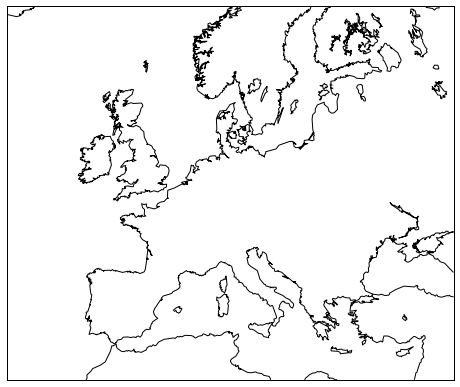

In [216]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1.0);

In [217]:
lat = 53.565278
lon = 10.001389

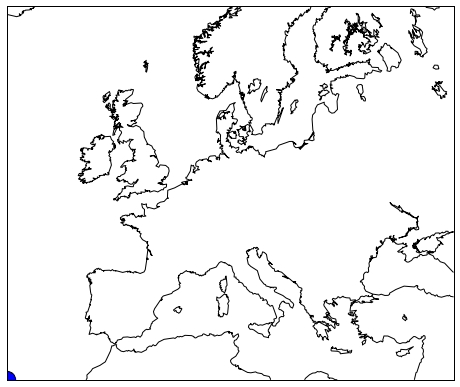

In [218]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1.0);
m.scatter(lon,lat,300)

In [219]:
print(' xmin {}\n xmax {}\n ymin {}\n ymax {}'.format(str(m.xmin),str(m.xmax),str(m.ymin),str(m.ymax)))

 xmin 0.0
 xmax 6570334.45745
 ymin 0.0
 ymax 5495424.02281


In [220]:
x,y = m(lon,lat)

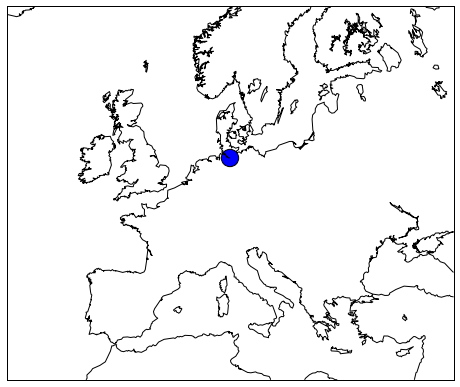

In [223]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1.0);
m.scatter(x,y,300)

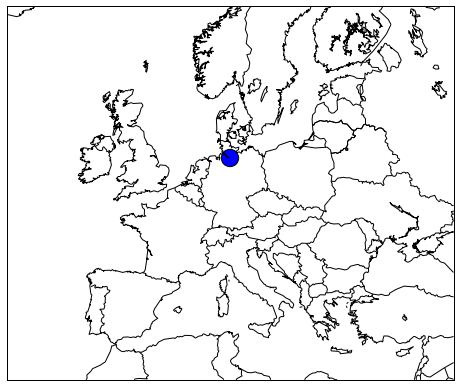

In [225]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.scatter(x,y,300)

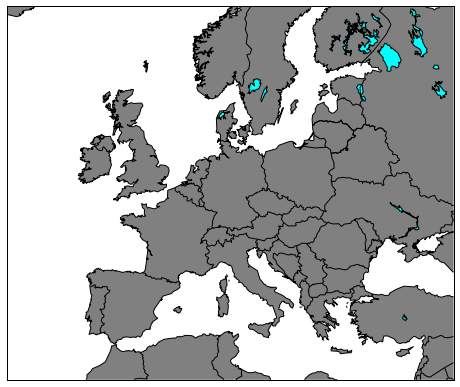

In [226]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='gray',lake_color='aqua')
m.scatter(x,y,300)


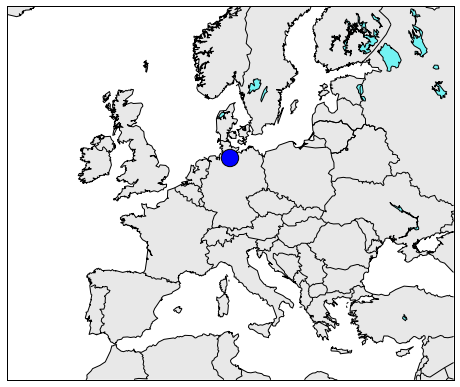

In [230]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',lake_color='aqua',alpha=0.5)
m.scatter(x,y,300,zorder=10);

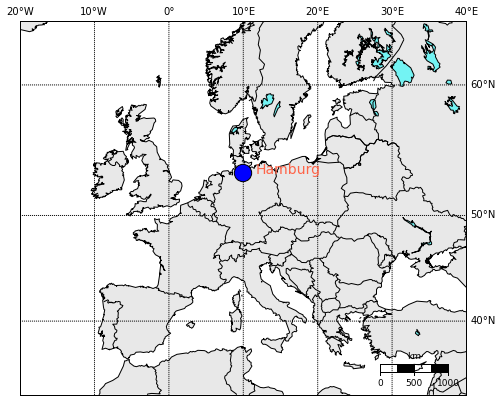

In [231]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',lake_color='aqua',alpha=0.5)
m.drawmeridians(np.arange(0,360,10),labels=[False,True,True,False])
m.drawparallels(np.arange(-90,90,10),labels=[False,True,True,False])
m.drawmapscale(33,35,0,40,1000,barstyle='fancy')
m.scatter(x,y,300,zorder=10)
plt.text(x+200000,y-20000,"Hamburg",color='tomato',size=14);

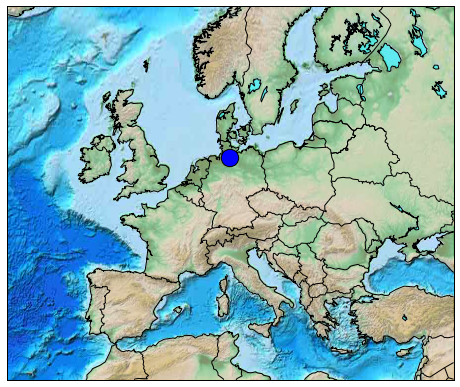

In [232]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',lake_color='aqua',alpha=0.5)
m.etopo()
m.scatter(x,y,300,zorder=10)

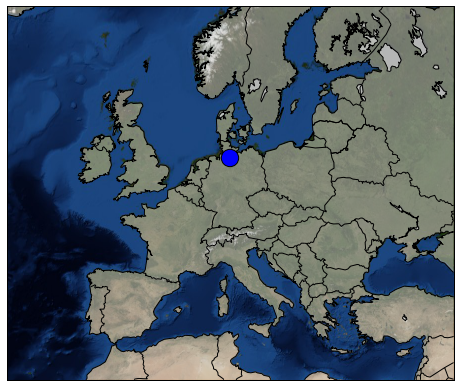

In [233]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',alpha=0.5)
m.bluemarble()
m.scatter(x,y,300,zorder=10)

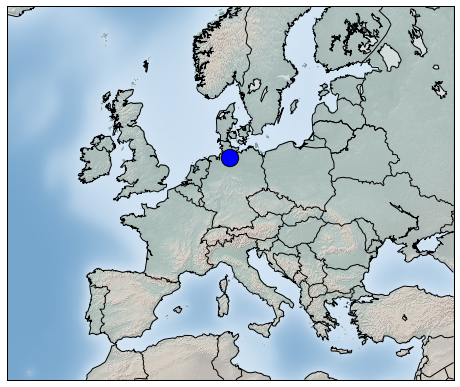

In [234]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',alpha=0.5)
m.shadedrelief()
m.scatter(x,y,300,zorder=10)

In [236]:
reg = pd.read_json('ips.json')

In [237]:
reg.head()

,Number,city,continent,country_code3,country_name,latitude,longitude,region_code
100.44.124.8,26,None,NA,USA,United States,38.0000,-97.0000,None
108.171.252.242,24,Walnut,NA,USA,United States,34.0115,-117.8535,CA
109.165.31.156,12,None,EU,RUS,Russian Federation,60.0000,100.0000,None
109.171.109.164,4,Novosibirsk,EU,RUS,Russian Federation,55.0415,82.9346,53
109.191.82.110,14,None,EU,RUS,Russian Federation,60.0000,100.0000,None


In [238]:
latlon = reg.groupby(['latitude','longitude']).sum()

In [239]:
latlon.reset_index(inplace=True)

In [240]:
x, y = m(latlon.longitude.values,latlon.latitude.values)

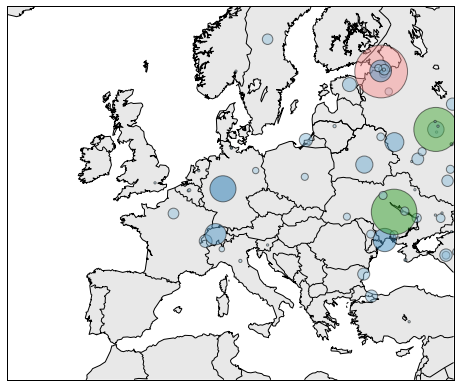

In [244]:
plt.figure(figsize=(8,7))
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',alpha=0.5)
m.scatter(x,y,s=latlon['Number']*5,c=latlon['Number']/5,cmap=cm.Paired,alpha=0.5,zorder=10)

In [ ]:
#!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc

In [245]:
from netCDF4 import Dataset

In [246]:
fl = Dataset('air.mon.mean.nc')
air = fl.variables['air'][0,:,:]
lat = fl.variables['lat'][:]
lon = fl.variables['lon'][:]

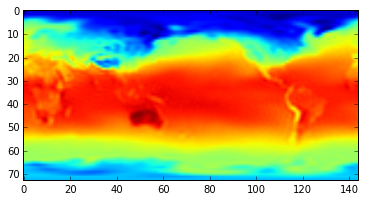

In [247]:
plt.imshow(air)

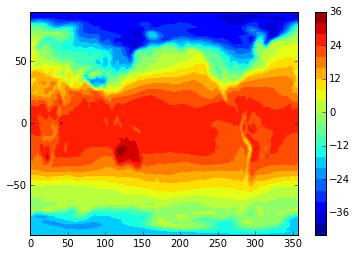

In [248]:
plt.contourf(lon,lat,air,20)
plt.colorbar();

In [249]:
lon.shape

(144,)

In [250]:
lon2, lat2 = np.meshgrid(lon,lat)

In [251]:
lon2.shape

(73, 144)

In [252]:
m = Basemap(projection='ortho',lat_0=45,lon_0=0,resolution='l')
x, y = m(lon2, lat2)

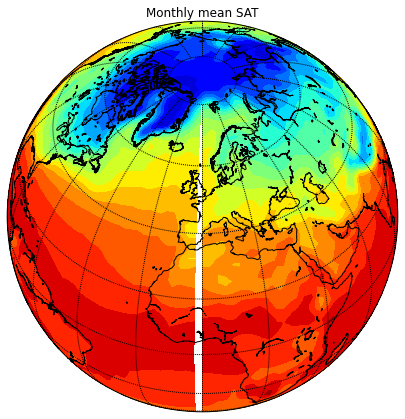

In [257]:
fig = plt.figure(figsize=(15,7))
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
cs = m.contourf(x,y,air,20)
plt.title('Monthly mean SAT');

In [258]:
lon

array([   0. ,    2.5,    5. ,    7.5,   10. ,   12.5,   15. ,   17.5,
         20. ,   22.5,   25. ,   27.5,   30. ,   32.5,   35. ,   37.5,
         40. ,   42.5,   45. ,   47.5,   50. ,   52.5,   55. ,   57.5,
         60. ,   62.5,   65. ,   67.5,   70. ,   72.5,   75. ,   77.5,
         80. ,   82.5,   85. ,   87.5,   90. ,   92.5,   95. ,   97.5,
        100. ,  102.5,  105. ,  107.5,  110. ,  112.5,  115. ,  117.5,
        120. ,  122.5,  125. ,  127.5,  130. ,  132.5,  135. ,  137.5,
        140. ,  142.5,  145. ,  147.5,  150. ,  152.5,  155. ,  157.5,
        160. ,  162.5,  165. ,  167.5,  170. ,  172.5,  175. ,  177.5,
        180. ,  182.5,  185. ,  187.5,  190. ,  192.5,  195. ,  197.5,
        200. ,  202.5,  205. ,  207.5,  210. ,  212.5,  215. ,  217.5,
        220. ,  222.5,  225. ,  227.5,  230. ,  232.5,  235. ,  237.5,
        240. ,  242.5,  245. ,  247.5,  250. ,  252.5,  255. ,  257.5,
        260. ,  262.5,  265. ,  267.5,  270. ,  272.5,  275. ,  277.5,
      

In [259]:
from mpl_toolkits.basemap import addcyclic

In [260]:
air_cyc, lon_cyc = addcyclic(air, lon)

In [261]:
lon_cyc

array([   0. ,    2.5,    5. ,    7.5,   10. ,   12.5,   15. ,   17.5,
         20. ,   22.5,   25. ,   27.5,   30. ,   32.5,   35. ,   37.5,
         40. ,   42.5,   45. ,   47.5,   50. ,   52.5,   55. ,   57.5,
         60. ,   62.5,   65. ,   67.5,   70. ,   72.5,   75. ,   77.5,
         80. ,   82.5,   85. ,   87.5,   90. ,   92.5,   95. ,   97.5,
        100. ,  102.5,  105. ,  107.5,  110. ,  112.5,  115. ,  117.5,
        120. ,  122.5,  125. ,  127.5,  130. ,  132.5,  135. ,  137.5,
        140. ,  142.5,  145. ,  147.5,  150. ,  152.5,  155. ,  157.5,
        160. ,  162.5,  165. ,  167.5,  170. ,  172.5,  175. ,  177.5,
        180. ,  182.5,  185. ,  187.5,  190. ,  192.5,  195. ,  197.5,
        200. ,  202.5,  205. ,  207.5,  210. ,  212.5,  215. ,  217.5,
        220. ,  222.5,  225. ,  227.5,  230. ,  232.5,  235. ,  237.5,
        240. ,  242.5,  245. ,  247.5,  250. ,  252.5,  255. ,  257.5,
        260. ,  262.5,  265. ,  267.5,  270. ,  272.5,  275. ,  277.5,
      

In [262]:
lon2, lat2 = np.meshgrid(lon_cyc,lat)

In [263]:
m = Basemap(projection='ortho',lat_0=45,lon_0=0,resolution='l')
x, y = m(lon2, lat2)

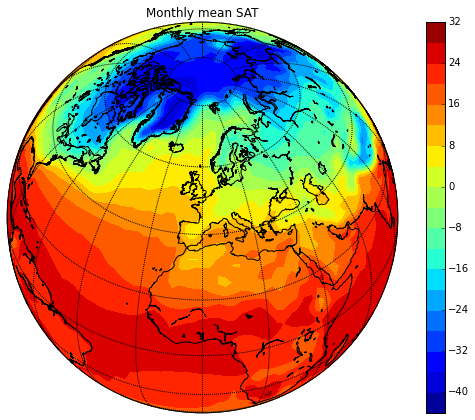

In [264]:
fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar();

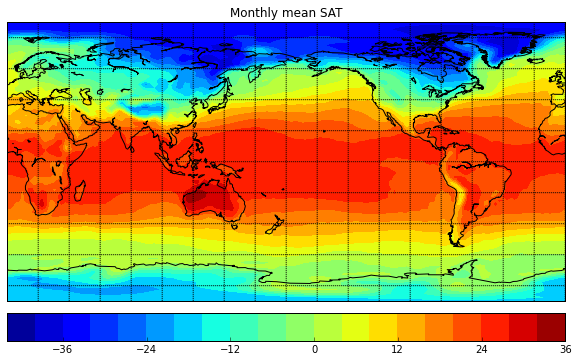

In [265]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar(orientation='horizontal', pad = 0.03);

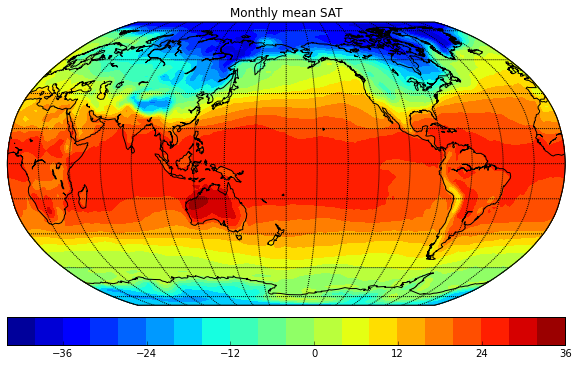

In [266]:
m = Basemap(projection='robin',lon_0=180,resolution='c')
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar(orientation='horizontal', pad = 0.03);

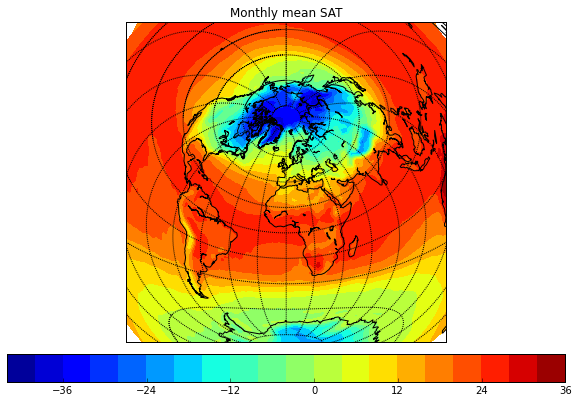

In [267]:
width = 28000000; lon_0 = 0; lat_0 = 40
m = Basemap(width=width,height=width,projection='aeqd',
            lat_0=lat_0,lon_0=lon_0)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar(orientation='horizontal', pad = 0.03);

In [ ]:
#!wget https://github.com/ocefpaf/python4oceanographers/raw/master/content/downloads/notebooks/data/challenger_path.csv

In [268]:
lon, lat = np.loadtxt('./challenger_path.csv', delimiter=',', unpack=True)

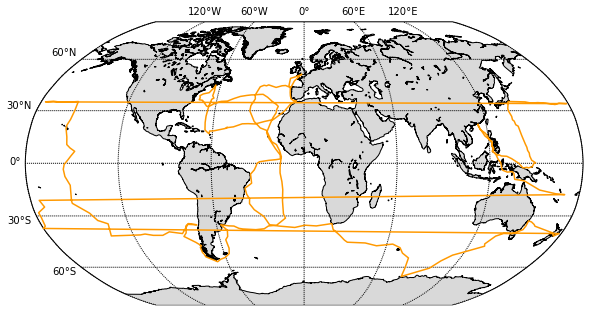

In [269]:
plt.figure(figsize=(10,7))
m = Basemap(projection='robin', resolution='l',
            lon_0=0)
x,y = m(lon,lat)
m.drawcoastlines()
m.fillcontinents(color='0.85')
parallels = np.arange(-60, 90, 30.)
meridians = np.arange(-360, 360, 60.)
m.drawparallels(parallels, labels=[1, 0, 0, 0])
m.drawmeridians(meridians, labels=[0, 0, 1, 0])
m.plot(x,y,color='#FF9900', linestyle='-', linewidth=1.5)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

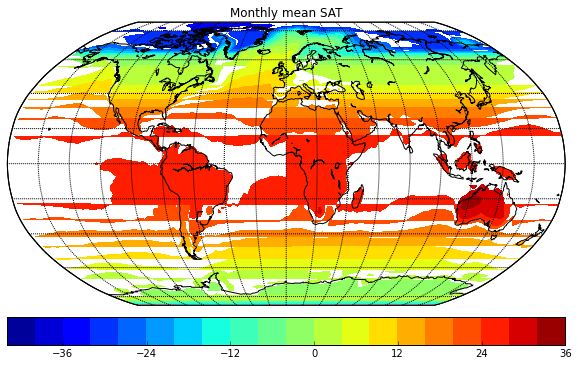

In [270]:
m = Basemap(projection='robin',lon_0=0,resolution='c')
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(10,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_cyc,20)
plt.title('Monthly mean SAT');
plt.colorbar(orientation='horizontal', pad = 0.03);